<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 5</b>


Thank you very much for your diligence! I've left a couple of new comments with digit 5. However, there are no issues that need to be fixed, so I can accept the project. Congratulations and good luck! 😊 
    
 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 4</b>


Very good, thank you so much! My new comments have digit 4. Would you take a look? It should not take much time. Don't forget to run the code before submitting it. 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


You almost finished it, great job! My new comments have digit 3. There are just a couple of issues this time. Would you please take a look?
 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2 </b>
    
Thank you very much for re-submitting the project! Yes, I understand, but I don't just check the code. I check the project and I must understand your reasoning at each step you take. It is not enough to train a model because everybody can do it. What we learn here is how to analyze data, choose features (feature engineering), train models, analyze the results, improve models, tune hyperparameters and so on. Therefore, the writing part is indeed very important, so would you please add it?  
    

Please don't move or remove reviewer's comments as I kindly asked last time. 


I still left several comments with digit 2 that should help you 😊</div>

# A Model to Predict the Amount of Gold Recovery from Gold Ore

## Introduction

The project is based on the extraction and purfication data from Zyfra, a gold mining company to develop a prototype of a machine learning model to predict the amount of gold recovered from gold ore. 

## Data Overview

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

### Open the files and look into the data

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
display(train, test, full.head(5))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [5]:
display(train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']])


,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,19.793808,6.486150,1.170244
1,20.050975,6.478583,1.184827
2,19.737170,6.362222,1.162562
3,19.320810,6.118189,1.079755
4,19.216101,5.663707,1.012642
...,...,...,...
16855,18.603550,5.335862,0.748633
16856,18.441436,4.838619,0.771582
16857,15.111231,4.525061,0.685059
16858,17.834772,4.362781,0.567130


In [6]:
train_data = train.dropna()
test_data = test.dropna()
full_data = full.dropna()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3</h2>
    
Yes, we can do it for the error estimation below, but we have to keep in mind that we will need to fill in the gaps later. 
    
</div>

In [7]:
def calculate_recovery(data):
    C = data['rougher.output.concentrate_au']
    F= data['rougher.input.feed_au']
    T= data['rougher.output.tail_au']
    if F==0 or C==0:
        return 0
    return (C * (F - T)) / (F * (C - T)) * 100

In [8]:
train_data['calculated_recovery'] = train_data.apply(calculate_recovery, axis=1)
print(train_data['calculated_recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: calculated_recovery, Length: 11017, dtype: float64


/tmp/ipykernel_50/1593374746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['calculated_recovery'] = train_data.apply(calculate_recovery, axis=1)


In [9]:
train_mae = mean_absolute_error(train_data['rougher.output.recovery'], train_data['calculated_recovery'])
display(train_mae)

9.460144184559453e-15

train_mae', a mean absolute error (MAE) is a regression evaluation metric to measure the average absolute difference between the 'rougher.output.recovery' and 'calculated_recovery'. 'train_mae' is 9.46e-15, lower MAE which means that on average the calcuated recovery are closer to the actual rougher.output.recovery values, which indicates better performance. As MAE is 9.46e-15, it shows that on average the predictions are off by 9.46e-15 units. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
What can be inferred here? 
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
So it means that the given data is correct.
</div>

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [10]:
train.shape

(16860, 87)

In [11]:
feature_columns_train = set(train.columns)
feature_columns_test = set(test.columns)
features_missing_in_test = feature_columns_train - feature_columns_test
print(features_missing_in_test)

{'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_pb', 'final.output.tail_ag', 'primary_cleaner.output.tail_sol', 'rougher.output.tail_sol', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au', 'final.output.concentrate_sol', 'rougher.output.tail_ag', 'final.output.concentrate_pb', 'rougher.output.concentrate_au', 'final.output.tail_sol', 'primary_cleaner.output.tail_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.tail_au', 'final.output.tail_au', 'final.output.tail_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'final.output.recovery', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_pb', 'rougher.output.recovery', 'rougher.output.concentrate_sol', 'final.output.concentrate_au', 'rougher.calculation.au_pb_ratio', 'secondary_c

In [12]:
print("Features in training but not in test with their data types:")
for feature in features_missing_in_test:
    print(f"{feature}: {train_data[feature].dtype}")

Features in training but not in test with their data types:
primary_cleaner.output.tail_ag: float64
rougher.output.concentrate_ag: float64
primary_cleaner.output.concentrate_ag: float64
rougher.output.concentrate_pb: float64
final.output.tail_ag: float64
primary_cleaner.output.tail_sol: float64
rougher.output.tail_sol: float64
primary_cleaner.output.concentrate_au: float64
secondary_cleaner.output.tail_au: float64
final.output.concentrate_sol: float64
rougher.output.tail_ag: float64
final.output.concentrate_pb: float64
rougher.output.concentrate_au: float64
final.output.tail_sol: float64
primary_cleaner.output.tail_pb: float64
rougher.calculation.sulfate_to_au_concentrate: float64
primary_cleaner.output.tail_au: float64
final.output.tail_au: float64
final.output.tail_pb: float64
primary_cleaner.output.concentrate_pb: float64
secondary_cleaner.output.tail_ag: float64
rougher.output.tail_au: float64
final.output.recovery: float64
rougher.calculation.floatbank11_sulfate_to_au_feed: float6

In [13]:
num_missing_columns = len(features_missing_in_test)
print("Number of missing columns in test dataset:", num_missing_columns)

Number of missing columns in test dataset: 34


There are 34 features in the train set which are not available in test set. Most of the features are from tehnological process such as cleaner process, rougher au, and final au. Along with it all the features are from stages such as rougher, primary_cleaner, and final except secondary_cleaner. Lastly, those features are from parameter type such as output, state, and calculation except input. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
What can be inferred here? 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
It is important to note that these are the values obtained after the process is complete. Therefore, we need to make sure we don't use them during the training.
    
    
</div>

### Perform data preprocessing

In [14]:
n_rows, n_cols = train.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

n_rows, n_cols = test.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

n_rows, n_cols = full.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 16860 rows and 87 columns
The DataFrame has 5856 rows and 53 columns
The DataFrame has 22716 rows and 87 columns


In [15]:
train['date'] = pd.to_datetime(train['date'])
train['date'] = pd.to_numeric(train['date'])
train['date'] = train['date'] / 100000000000

Yes, without doing this, the value doesn't look like a date.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
> `train['date'] / 100000000000`
    
    
Do we need it? 
    
</div>

In [16]:
test['date'] = pd.to_datetime(test['date'])
test['date'] = pd.to_numeric(test['date'])
test['date'] = test['date'] / 100000000000

In [17]:
full['date'] = pd.to_datetime(full['date'])
full['date'] = pd.to_numeric(full['date'])
full['date'] = full['date'] / 100000000000

#### Duplicates

In [18]:
data = {
    'train': train,
    'test': test,
     'full': full}

In [19]:
def find_remove_duplicates(data):
    duplicates = data[data.duplicated()]
    return duplicates

for key, df in data.items():
    duplicates = find_remove_duplicates(df)
    print(f"Number of duplicated rows in {key}: {duplicates.shape[0]}")

Number of duplicated rows in train: 0
Number of duplicated rows in test: 0
Number of duplicated rows in full: 0



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Good.     
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
The function is called `find_remove_duplicates`, but it does not remove anything.</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Try not to define a function inside another function.     
</div>

In [20]:
train.isna().sum().sort_values(ascending=False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

In [21]:
test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_f_air                17
secondary_cleaner.state.floatbank3_a_level     16


In [22]:
full.isna().sum().sort_values(ascending=False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_au                      2736
rougher.output.tail_sol                     2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

## Data Analysis

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [23]:
au_stage_concentration_change = full[['primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']]

ag_stage_concentration_change = full[['primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']]

pb_stage_concentration_change = full[['primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']]

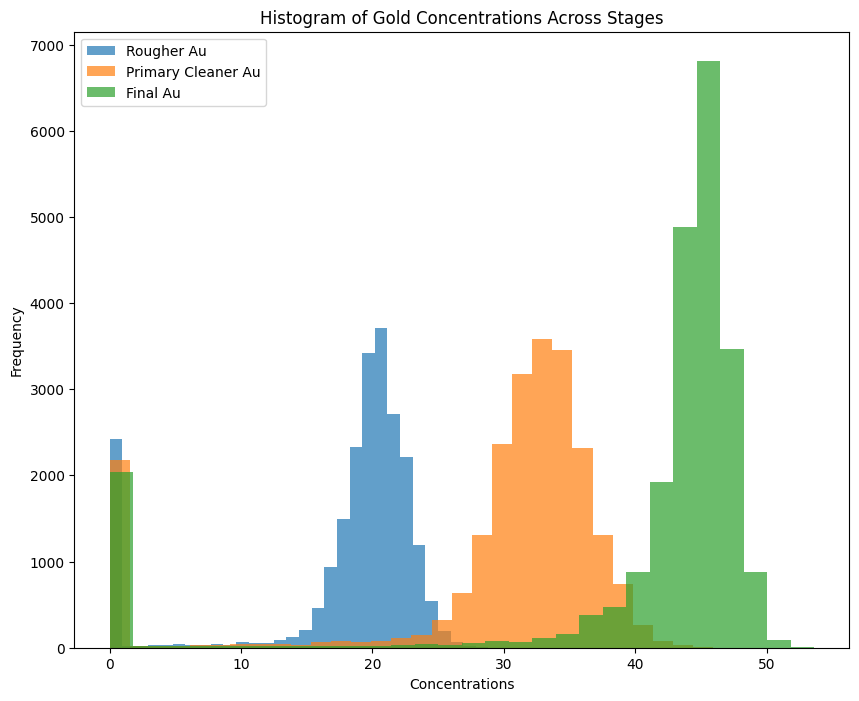

In [24]:
au_stage_concentration_change = full[['primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']]

plt.figure(figsize=(10, 8))  

plt.hist(au_stage_concentration_change['rougher.output.concentrate_au'], bins=30, alpha=0.7, label='Rougher Au')
plt.hist(au_stage_concentration_change['primary_cleaner.output.concentrate_au'], bins=30, alpha=0.7, label='Primary Cleaner Au')
plt.hist(au_stage_concentration_change['final.output.concentrate_au'], bins=30, alpha=0.7, label='Final Au')
plt.title('Histogram of Gold Concentrations Across Stages')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram above shows the distribution of gold concentrations across three processing stages in a ore purification process: Primary Cleaner, Rougher metal concentration and Final metal concentration. Rougher Gold (Au) indicates the inital stage of procession and shows its histogram shows lower gold concentrations with a peak around 30-32 units. Primary Cleaner Gold (Au) represents the intermediate stage after the rougher process. Thus, the concentrations are more centralized and slightly higher compared to the rougher stage. Lastly, Final Gold (Au) represents the final stage of ore purification process. The distribution shows significantly higher concentrations of gold with peaks around 45 units. Overall, it can be known that rougher gold genrally have lower concentratrions of gold as its the starting stage which might have other metals or raw materials. Primary Cleaner Gold shows an increase in gold concentration compared to the rougher stage indicating the efficiency of the cleaning stage. Lastly, Final Gold has the highest concentrations demonstrating that the ore purification process works effectively as most of the gold content is concentrated at the end. 

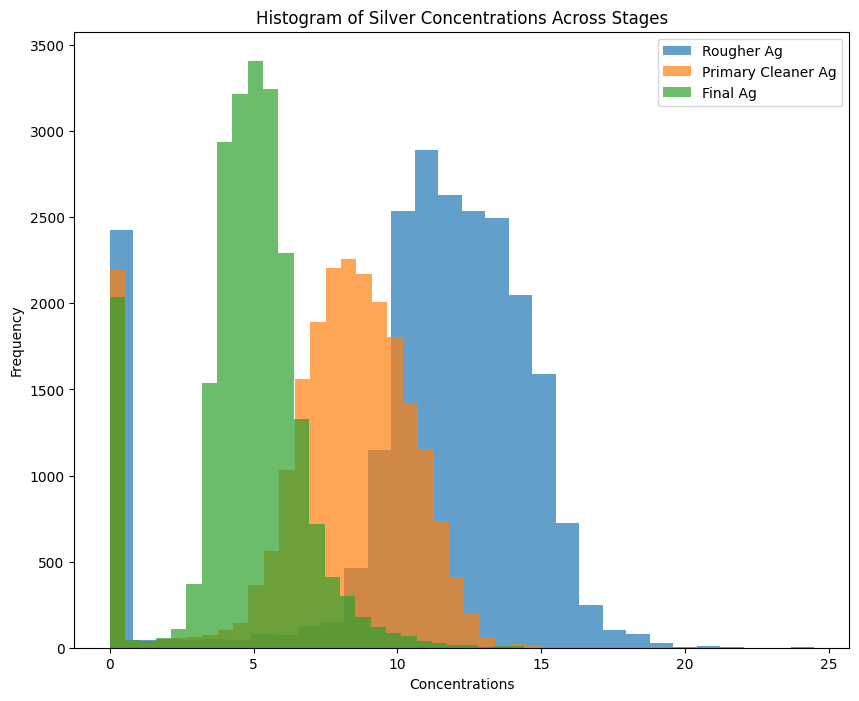

In [25]:
ag_stage_concentration_change = full[['primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']]

plt.figure(figsize=(10, 8))  

plt.hist(ag_stage_concentration_change['rougher.output.concentrate_ag'], bins=30, alpha=0.7, label='Rougher Ag')
plt.hist(ag_stage_concentration_change['primary_cleaner.output.concentrate_ag'], bins=30, alpha=0.7, label='Primary Cleaner Ag')
plt.hist(ag_stage_concentration_change['final.output.concentrate_ag'], bins=30, alpha=0.7, label='Final Ag')
plt.title('Histogram of Silver Concentrations Across Stages')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram above shows the distribution of silver concentrations across three processing stages in a ore purification process: Primary Cleaner, Rougher metal concentration and Final metal concentration. Rougher Silver (Ag) is the initial stage of processing. The silver concentrations are broadly distributed, with a peak around 9-12 units. Primary Cleaner Silver (Ag) represents the intermediate stage after the rougher process. The silver concentrations are concentrated in a range around 6-11 units. A noticable shift, to the right compared to the rougher stage, indicating a moderate increase in silver concentration during this stage. Lastly, Final silver (Ag) represents the final stage of processing. Silver concentrations are clustered and significantly lower, peaking around 4-7 units. This might shows that silver content decreases in the final stage due to losses in refining for gold. It can be seen that during all three stages, there are some lower concentrations (closer to 0) present, likely representing unprocessed raw materials or loss during the early process. Overall, unlike like the gold histogram, silver concentrations declines in the final stage as the primary focus is to purify gold in this ore purification process. 

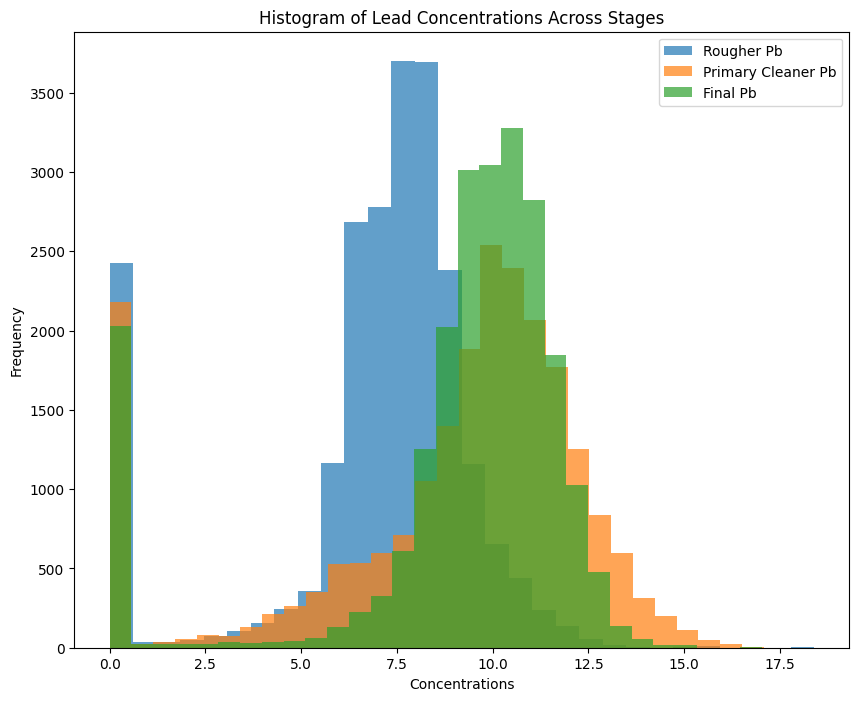

In [26]:
pb_stage_concentration_change = full[['primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']]

plt.figure(figsize=(10, 8))  

plt.hist(pb_stage_concentration_change['rougher.output.concentrate_pb'], bins=30, alpha=0.7, label='Rougher Pb')
plt.hist(pb_stage_concentration_change['primary_cleaner.output.concentrate_pb'], bins=30, alpha=0.7, label='Primary Cleaner Pb')
plt.hist(pb_stage_concentration_change['final.output.concentrate_pb'], bins=30, alpha=0.7, label='Final Pb')
plt.title('Histogram of Lead Concentrations Across Stages')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram above shows the distribution of lead concentrations across three processing stages in a ore purification process: Primary Cleaner, Rougher metal concentration and Final metal concentration. Rougher Lead (Pb) is the initial stage of processing. The distribution peaks around 7-9 units and is more compact compared to the other stages. Primary Cleaner Lead (Pb) represents the intermediate stage after the rougher process. The concentration distribution is more spread out and peaks around 10-12 units. This stage seems to improve lead concentration compared to the rougher stage. Lastly, Final Lead (Pb) represents the final processing stage. Concentrations peak around 9-11 units, with a tigher distributions compared to the Primary Cleaner stage. But, lead concentrations in the final stage are better than that in primary cleaner stage which might mean that during the purification process lead is purified too when trying to purify gold.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Very good job! 
    
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2 </b>
    
Let's analyze histograms here.  For this purpose, please use  `primary_cleaner.output.concentrate_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns for each of the three metals. We need to see how concentration changes from stage to stage for each metal.


</div>

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [27]:
train_feed_size = train['rougher.input.feed_size'] + train['primary_cleaner.input.feed_size']
test_feed_size = test['rougher.input.feed_size'] + test['primary_cleaner.input.feed_size']

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
I would display separate charts. I apologize for not being specific enough last time :)     
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
I see the updates, good. 
    
    
</div>

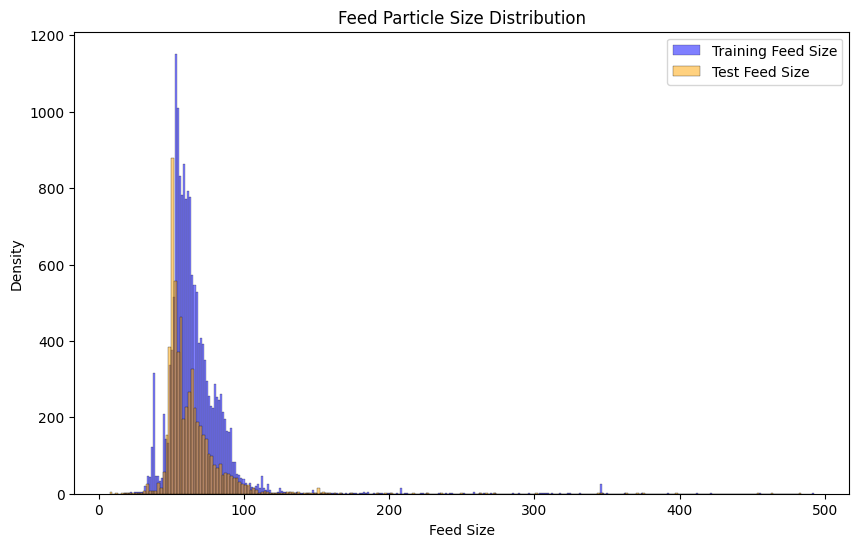

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(train_feed_size, label='Training Feed Size', color='blue', fill=True, alpha=0.5)
sns.histplot(test_feed_size, label='Test Feed Size', color='orange', fill=True, alpha=0.5)
plt.title('Feed Particle Size Distribution')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()


The above graph represents the feed particle size distribution (including both rougher.input.feed_size and primary.cleaner.input.feed_size) for both training and test datasets. The distributions for training and test dataset overlap significantly suggesting that both datasets have similar particle size characteristics. The overlap indicates consistency between both datasets, which supports the validity of any models trained on this data. Both datasets have a sharp peak in density at approximately 50-75 feed size units representing the most common particle size range. This indicates that the majority of particles are within this size range. Both distributions are extended to larger particle sizes upto 500 units, but the density of these regions is much lower. This suggests that larger particles are present in both but mostly in train datasets but occur infrequently. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Looks good. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2 </b>
    
Please use `primary_cleaner.input.feed_size` as well. Don't forget to add a conclusion. 

</div>

In [29]:
train_rougher_feed_size = train['rougher.input.feed_size'] 
train_primary_cleaner_feed_size = train['primary_cleaner.input.feed_size']

test_rougher_feed_size = test['rougher.input.feed_size'] 
test_primary_cleaner_feed_size = test['primary_cleaner.input.feed_size']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
Yes, this is exactly what I mean.    
    
</div>

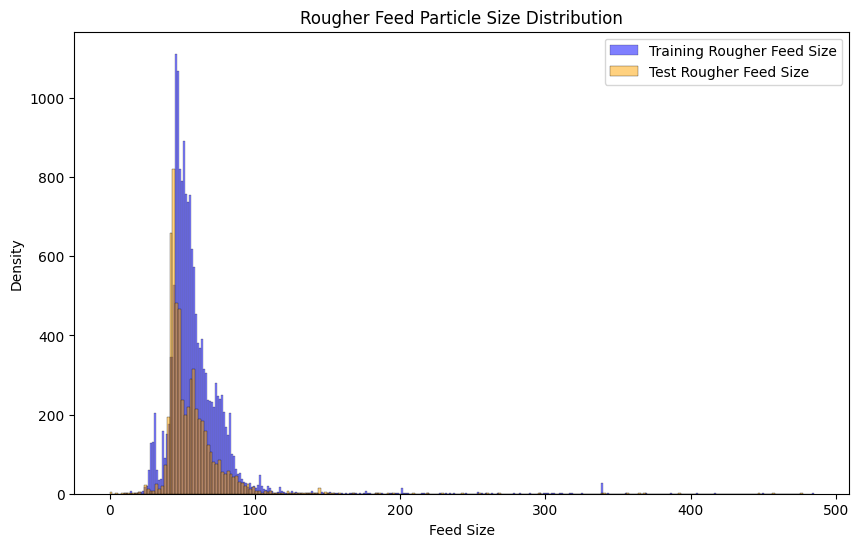

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(train_rougher_feed_size, label='Training Rougher Feed Size', color='blue', fill=True, alpha=0.5)
sns.histplot(test_rougher_feed_size, label='Test Rougher Feed Size', color='orange', fill=True, alpha=0.5)

plt.title('Rougher Feed Particle Size Distribution')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()


The above graph represents the  rougher feed particle size distribution for both training and test datasets. The distributions for training and test dataset overlap significantly, especially in the smaller feed size range suggesting that both datasets have similar particle size characteristics. The overlap indicates consistency between both datasets, which supports the validity of any models trained on this data. Both datasets have a sharp peak in density at approximately 50-75 feed size units representing the most common particle size range. This indicates that the majority of particles are within this size range. The test dataset has slightly less density than the training dataset in some parts of the distribution. Both distributions are extended to larger particle sizes upto 500 units, but the density of these regions is much lower. This suggests that larger particles are present in both but mostly in train datasets but occur infrequently.

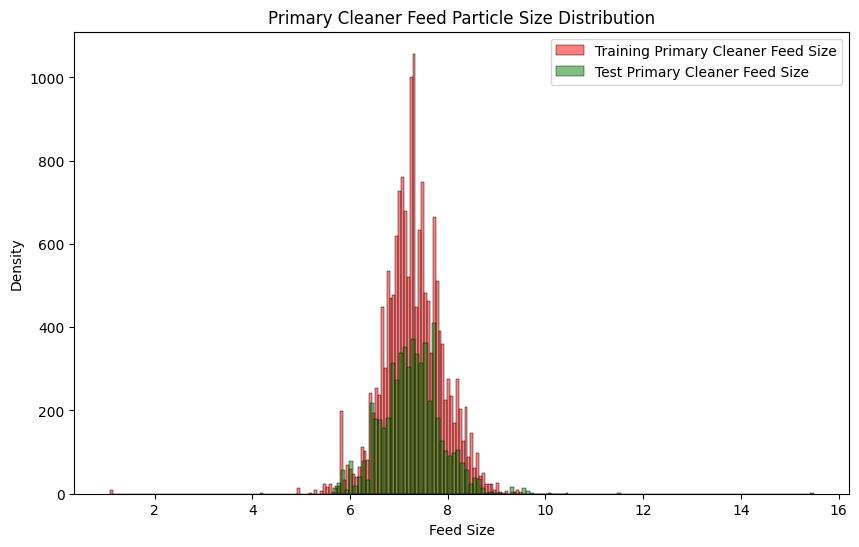

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(train_primary_cleaner_feed_size, label='Training Primary Cleaner Feed Size', color='red', fill=True, alpha=0.5)
sns.histplot(test_primary_cleaner_feed_size, label='Test Primary Cleaner Feed Size', color='green', fill=True, alpha=0.5)

plt.title('Primary Cleaner Feed Particle Size Distribution')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()


The above graph represents the primary cleaner feed particle size distribution for both training and test datasets. The distributions for training and test dataset overlap significantly, especially in the smaller feed size range (6-8) suggesting that both datasets have similar particle size characteristics. The overlap indicates consistency between both datasets, which supports the validity of any models trained on this data. Both datasets have a sharp peak in density at approximately 7-8 feed size units representing the most common particle size range. This indicates that the majority of particles are within this size range. The test dataset has slightly less density than the training dataset in some parts of the distribution. Both distributions are limited to smaller particle sizes upto 16 units, but the density of the regions after feed size 9 is much lower.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

In [32]:
total_concentrations_raw_feed = (full['rougher.input.feed_ag'] + full['rougher.input.feed_au'] + full['rougher.input.feed_pb'])

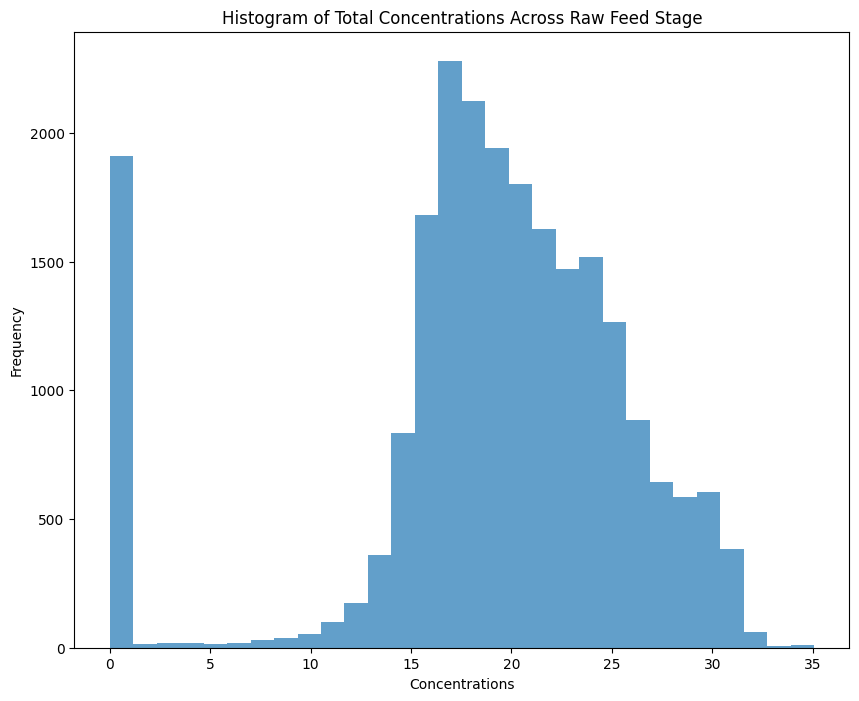

In [33]:
plt.figure(figsize=(10, 8))  

plt.hist(total_concentrations_raw_feed, bins=30, alpha=0.7, label='Total Concentrations at Raw Feed Stage')
plt.title('Histogram of Total Concentrations Across Raw Feed Stage')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
Good. 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
By the way, legend can be disabled.     
    
</div>

The above histogram is displaying the distribution of "Total Concentration" across "Raw Feed" stage. There is a high frequency at 0 concentration suggesting the raw materials in which there are no metals such as Gold, Silver, and Lead present. Other than this, majority of the data points are concentrated between 15 to 30 forming a peak around 18-20. This represents the typical range of concentrations observed at the raw feed stage. There are some outliers which have higher concentrations above 30 which shows that extremely high concentrationbs are rare. Overall, the histogram shows a right-skewed distribution with most data points concentrated in a central range with few outliers at higher concentrations. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
You are displaying first 5 rows. Try to use histograms in order to display *distributions*.     
</div>

In [34]:
total_concentrations_rougher_concentrate = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_pb'])

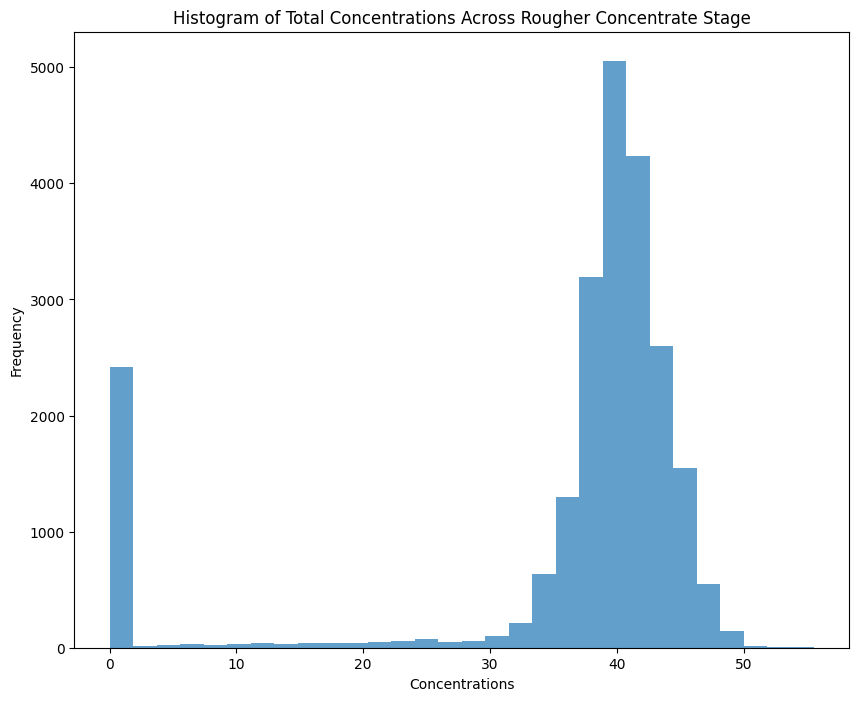

In [35]:
plt.figure(figsize=(10, 8))  

plt.hist(total_concentrations_rougher_concentrate, bins=30, alpha=0.7, label='Total Concentrations at Rougher Concentrate Stage')
plt.title('Histogram of Total Concentrations Across Rougher Concentrate Stage')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.show()

The above histogram is displaying the distribution of "Total Concentrations" across "Rougher Concentrate" stage. There is a high frequency at 0 concentration suggesting the raw materials in which there are no metals such as Gold, Silver, and Lead present. Other than this, majority of the data points are concentrated between 30 and 50 forming a peak around 40-45. This represents the typical range of concentrations observed during rougher concentrate stage likely representing the expected or normal performance of the rougher concentrate process. There are few outliers which have higher concentrations above 50 which shows that extremely high concentrationbs are rare. Overall, the histogram shows a right-skewed distribution with most data points concentrated in a central range which have higher metal concentrations when compared to that of inraw feed stage with few outliers at higher concentrations.

In [36]:
total_concentrations_final_concentrate = (full['final.output.concentrate_ag'] + full['final.output.concentrate_au'] + full['final.output.concentrate_pb'])

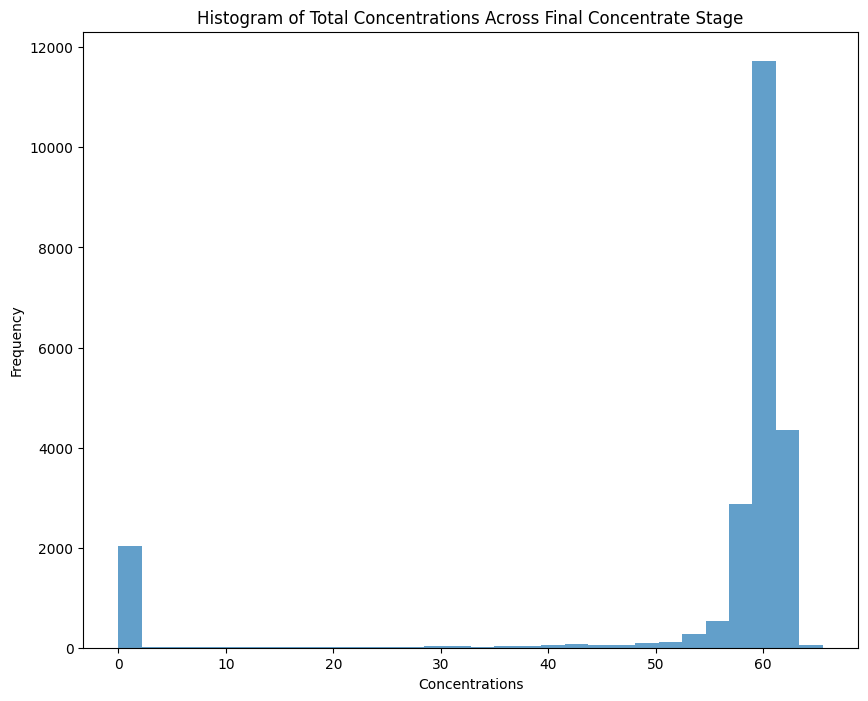

In [37]:
plt.figure(figsize=(10, 8))  

plt.hist(total_concentrations_final_concentrate, bins=30, alpha=0.7, label='Total Concentrations at Rougher Concentrate Stage')
plt.title('Histogram of Total Concentrations Across Final Concentrate Stage')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Correct.     
    
</div>

The above histogram is displaying the distribution of "Total Concentration" across "Final Concentragte" stage. There is a low frequency at 0 concentration suggesting the raw materials in which there are no metals such as Gold, Silver, and Lead present. The frequency at 0 concentration is much lower when compared it with that during Raw Feed and Rougher Concentrate stages. Other than this, majority of the data points are concentrated between 55 to 62 forming a peak around 58-60. This represents the typical range of concentrations observed at the final concentrate stage. There are some outliers which have higher concentrations above 62 which shows that extremely high concentrationbs are rare. Overall, the histogram shows a right-skewed distribution with most data points concentrated in a central range with few outliers at higher concentrations.

Overall, all these three graphs represents the total metal concentrations during raw feed, rougher conentrate and final concentrate stages respectively. Comparing all three graphs together represents that the higher frequency at 0 concentrations is decreasing from stages to stages starting from raw feed to final concentrate. Following this all graphs are right skewed but the concentration range of most data points in these stages is increasing from stages to stages which represents that during the purification process the total concentrations of metals which includes gold, silver and, lead is increasing as they are purified by removing the waste raw materials. The abnormal values I saw among all three graphs are the frequency at 0 concentrations. But, I think it is worth removing those data points as those are disrupting data resulting into NaN values. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Good. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
So there will be 3 charts here. 
    
</div>

## Dealing with NA and missing values

### Training Set

In [38]:
train.shape

(16860, 87)

In [39]:
# Dropping the features which are not present in test dataset. 

target_columns = ['rougher.output.recovery', 'final.output.recovery']

feature_columns_train = set(train.columns) - set(target_columns)
features_missing_in_test = feature_columns_train - feature_columns_test

train = train.drop(columns=features_missing_in_test)

I dropped the feature columns which are missing in test set but present in train set as the model won't fit if the columns in both sets are not same. So, I dropped all those 34 columns and thus both test and train dataset will have same features. 

In [40]:
train.shape

(16860, 55)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Very good.     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
Would you elborate please? Which columns do you take a why?     
</div>

In [41]:
# Columns with zero as its values
train_zero = (train['rougher.input.feed_ag'] == 0) | (train['rougher.input.feed_pb'] == 0) | (train['rougher.input.feed_au'] == 0)

In [42]:
# Removing rows with zero values from the dataset
train = train[~train_zero]
train.shape

(15701, 55)

In both datasets, there are some columns such as rough.input.feed_au with 0 vas its values. Running this kind of datasets will result in NaN values for the targets of recovery so it is important to drop or not include them from the datasets. 

In [43]:
# Removing rows with values less than 1 from the dataset
train_min = (train['rougher.input.feed_ag'] <= 1) | (train['rougher.input.feed_pb'] <= 1) | (train['rougher.input.feed_au'] <= 1)

In [44]:
train = train[~train_min]
train.shape

(15123, 55)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 3</b>
    
Don't forget to analyze the outputs. The size did not change, which means we did not drop anything, prbably because there are no exactly zeros. There may be values such as 0.01.     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
There are still values that are very close to zero:</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
Good. 
    
</div>

In [45]:
# Dropping the missing values from target columns
train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
train.shape

(14029, 55)

In [46]:
# Reviewer's comment 4

train[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].min()

rougher.input.feed_ag    2.215688
rougher.input.feed_pb    1.006168
rougher.input.feed_au    1.009195
dtype: float64

In [47]:
# Reviewer's comment 4

train[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].describe()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au
count,14029.000000,13943.000000,14029.000000
mean,8.594526,3.544617,7.902166
std,1.882520,1.047427,1.880940
min,2.215688,1.006168,1.009195
25%,7.139330,2.796315,6.625490
50%,8.164230,3.432047,7.670383
75%,9.929421,4.234237,9.086265
max,14.596026,7.142594,13.126043


In [48]:
# Using ffill to fill the missing values
train = train.ffill()
print(train.isna().sum())

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

In [49]:
train.shape

(14029, 55)

### Test Set

In [50]:
test = pd.merge(test, full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [51]:
test.shape

(5856, 55)

In [52]:
# Columns with zero as its values
test_zero = (test['rougher.input.feed_ag'] == 0) | (test['rougher.input.feed_pb'] == 0) | (test['rougher.input.feed_au'] == 0)

In [53]:
# Removing rows with zero values from the dataset
test = test[~test_zero]
test.shape

(5487, 55)

In both datasets, there are some columns such as rough.input.feed_au with 0 vas its values. Running this kind of datasets will result in NaN values for the targets of recovery so it is important to drop or not include them from the datasets. 

In [54]:
# Removing rows with values less than 1 from the dataset
test_min = (test['rougher.input.feed_ag'] <= 1) | (test['rougher.input.feed_pb'] <= 1) | (test['rougher.input.feed_au'] <= 1)

In [55]:
test = test[~test_min]
test.shape

(5453, 55)

In [56]:
# Dropping the missing values from target columns
test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
test.shape

(5276, 55)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
Good. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
There are still values that are very close to zero:</div>

In [57]:
# Reviewer's comment 4

test[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].min()

rougher.input.feed_ag    2.667444
rougher.input.feed_pb    1.011167
rougher.input.feed_au    2.764981
dtype: float64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
Good. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
Choose some threshold and drop values larger than it. 

</div>

In [58]:
# Using ffill to fill the missing values
test = test.ffill()
print(test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Here I used 'ffill', to fill the missing values in all three datasets, train, test and full respectively. Along with it if there are any missing values in the target values, there will be errors as the model will not able to proceed  and dropped in missing values in target columns. So, now there are no missing values in any of the datasets. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Yes, `ffill` is a good choice here. 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Before we fill in the gaps, we need to drop missing values in target columns.     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Correct!     
    
</div>

In [59]:
train = train[test.columns]

## Build the Model

#### Rougher

In [60]:
# rougher = ['date','rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_rate','rougher.input.feed_size', 'rougher.input.feed_sol',
       #'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate','rougher.input.floatbank10_xanthate','rougher.input.floatbank11_sulfate',
       #'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air','rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       #'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air','rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       #'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air','rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       #'rougher.state.floatbank10_f_level', 'rougher.output.recovery']

#train_rougher = train[rougher].copy()
#test_rougher = test[rougher].copy()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
You don't need to do it, you only need to create two different target variables.     
</div>

In [61]:
train.shape

(14029, 55)

In [62]:
test.shape

(5276, 55)

In [63]:
# x_train
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#y_train_rougher
target_train_rougher = train['rougher.output.recovery']

#y_train_final
target_train_final = train['final.output.recovery']


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
Well done!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
Please drop both targets from the training data. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 3</b>
    
Both targets should be dropped form training data. 
    
</div>

In [64]:
display(features_train.shape)
display(target_train_rougher.shape)
display(target_train_final.shape)

(14029, 53)

(14029,)

(14029,)

In [65]:
# x_test
features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#y_train_rougher
target_test_rougher = test['rougher.output.recovery']

#y_train_final
target_test_final = test['final.output.recovery']


In [66]:
display(features_test.shape)
display(target_test_rougher.shape)
display(target_test_final.shape)

(5276, 53)

(5276,)

(5276,)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
Please drop both targets.    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 3</b>
    
Both targets should be dropped form training data. 
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
And here.    
</div>

<div class="alert alert-info"> <b> Student comment: </b> Is that what you mean, becasue this is what I had did before but the tutor mentioned to divide the datasets into two groups: rougher and final as he told there is no need to have those columns which are based on that specific step. Thus, I divided both train and test datasets into rougher and final groups. </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
You can do it this way, but you need to drop both targets, that's what I meant. Both approaches are fine, but in both cases we need to drop targets.     
</div>

### Write a function to calculate the final sMAPE value.

In [67]:
def smape(target, predict):
    num = np.abs(target - predict)
    den = (np.abs(target) + np.abs(predict)) / 2
    return np.mean(num/den) * 100

In [68]:
def final_smape(target_rougher, predict_rougher, target_final, predict_final):
    smape_rougher = smape(target_rougher, predict_rougher)
    smape_final = smape(target_final, predict_final)
    return 0.25 * smape_rougher + 0.75 * smape_final 

In [69]:
def smape_scorer(y_true, y_pred):
    return 100 * (abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)).mean()

smape_scorer = make_scorer(smape_scorer, greater_is_better=False)

<div class="alert alert-info"> <b> Student comment: </b> So, here the first two functions, smape and final smape are to calculate smape and final smape but smape_scorer is for grid search.    </div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 4</h2>
    
Isn't it just `smape`? Do you need to define a new function? 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 3</b>
    
Different functions should have different names even if you call them in a specific order.     
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Well done! 
    
</div>

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

#### Decision Tree Regression

In [75]:
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

In [76]:
model_dtr = DecisionTreeRegressor(random_state=7)

grid_search = GridSearchCV(
    estimator=model_dtr,
    param_grid=param_grid,
    scoring=smape_scorer,
    cv=4
)

In [77]:
grid_search.fit(features_train, target_train_rougher)
best_params_rougher = grid_search.best_params_
best_dtr_rougher = grid_search.best_estimator_

pred_rougher_output_recovery_train = best_dtr_rougher.predict(features_train)
smape_rougher_dtr = smape(target_train_rougher, pred_rougher_output_recovery_train)

print(f"Best Hyperparameters for Rougher: {best_params_rougher}")
print(f"Rougher sMAPE: {smape_rougher_dtr}")

Best Hyperparameters for Rougher: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}
Rougher sMAPE: 9.284121078995895


The sMAPE for Rougher train dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20} is 9.284121078995895.

In [78]:
grid_search.fit(features_train, target_train_final)
best_params_final = grid_search.best_params_
best_dtr_final = grid_search.best_estimator_

pred_final_output_recovery_train = best_dtr_final.predict(features_train)
smape_final_dtr = smape(target_train_final, pred_final_output_recovery_train)

print(f"Best Hyperparameters for Final: {best_params_final}")
print(f"Final sMAPE: {smape_final_dtr}")

Best Hyperparameters for Final: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Final sMAPE: 8.414827587769008


The sMAPE for Final train dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2} is 8.414827587769008.

In [73]:
final_smape_value_dtr = final_smape(
    target_train_rougher, pred_rougher_output_recovery_train,
    target_train_final, pred_final_output_recovery_train
)
print(f"Final sMAPE: {final_smape_value_dtr}")


Final sMAPE: 8.632150960575729


The Final sMAPE using decision tree regression model is 8.632150960575729.

These sMAPE values indicate the accuracy of the model's predictions for different datasets. Rougher train dataset sMAPE is 9.69 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.17, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 8.55 suggesting the overall model has a moderate prediction error.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Good! 
    
</div>

#### Random Forest Regression

In [69]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [70]:
model_rfr = RandomForestRegressor(random_state=7)

grid_search = GridSearchCV(
    estimator=model_rfr,
    param_grid=param_grid,
    scoring=smape_scorer,
    cv=4
)

In [73]:
grid_search.fit(features_train, target_train_rougher)
best_params_rougher = grid_search.best_params_
best_rfr_rougher = grid_search.best_estimator_

pred_rougher_output_recovery_train = best_rfr_rougher.predict(features_train)
smape_rougher_rfr = smape(target_train_rougher, pred_rougher_output_recovery_train)

print(f"Best Hyperparameters for Rougher: {best_params_rougher}")
print(f"Rougher sMAPE: {smape_rougher_rfr}")

Best Hyperparameters for Rougher: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Rougher sMAPE: 7.222414285410688


The sMAPE for Rougher train dataset based on the best hyperparameters of random forest regression : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} is 7.222414285410688

In [71]:
grid_search.fit(features_train, target_train_final)
best_params_final = grid_search.best_params_
best_rfr_final = grid_search.best_estimator_

pred_final_output_recovery_train = best_rfr_final.predict(features_train)
smape_final_rfr = smape(target_train_final, pred_final_output_recovery_train)

print(f"Best Hyperparameters for Final: {best_params_final}")
print(f"Final sMAPE: {smape_final_rfr}")

Best Hyperparameters for Final: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Final sMAPE: 6.285639488856175


The sMAPE for Final train dataset based on the best hyperparameters of random forest regression: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} is 6.285639488856175

In [74]:
final_smape_value_rfr = final_smape(
    target_train_rougher, pred_rougher_output_recovery_train,
    target_train_final, pred_final_output_recovery_train
)
print(f"Final sMAPE: {final_smape_value_rfr}")


Final sMAPE: 6.519833187994802


The Final sMAPE using random forest regression model for train dataset is 6.519833187994802.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Good! 
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment 2</b>
    
- Please keep in mind that our key metric is smape, so please use the correct scoring. 
    
    
- Try to tune hyperparameters. 
    
    
    
- Choose the best model and run the final test using the test subset. 
</div>

Based on the evaluation using cross-validation, among both models - Decision Tree Regression, and Random Forest Regression, Random Forest Regression is giving low error based on the smape scorer. But, Random Forest Regression is taking forever to run the code, so I choose Decision Tree Regression as the best models among those two. 

## Final model

In [79]:
pred_rougher_output_recovery_test = best_dtr_rougher.predict(features_test)
smape_rougher_dtr_test = smape(target_test_rougher, pred_rougher_output_recovery_test)

print(f"sMAPE for Rougher test dataset: {smape_rougher_dtr_test}")

sMAPE for Rougher test dataset: 9.204073612542519


The sMAPE for Rougher test dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2} is 9.204073612542519.

In [80]:
pred_final_output_recovery_test = best_dtr_final.predict(features_test)
smape_final_dtr_test = smape(target_test_final, pred_final_output_recovery_test)

print(f"sMAPE for Final test dataset: {smape_final_dtr_test}")

sMAPE for Final test dataset: 10.267992898631267


The sMAPE for Final test dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2} is 10.267992898631267.

In [81]:
final_smape_value = final_smape(
    target_test_rougher, pred_rougher_output_recovery_test,
    target_test_final, pred_final_output_recovery_test
)
print(f"Final sMAPE: {final_smape_value}")


Final sMAPE: 10.00201307710908


The Final sMAPE using decision tree regression model for train dataset is 10.00201307710908.

These sMAPE values indicate the accuracy of the model's predictions for different datasets. Rougher test dataset sMAPE is 8.87 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.6, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for test dataset represents the model's performance on the entire dataset which is 8.67 suggesting the overall model has a moderate prediction error.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 4</h2>
    
Good. 
    
</div>

## Conclusion

The project was from a gold mining sector of a compansy named Zyfra which develops efficiency solutions for heavy industry. For this company, the task given was to develop a prototype of a machine learning model by Zyfra. The model should predict the amount of gold recovered from gold ore. The dataset on extraction and purification was used to develop the model which will help to optimize the production and eliminate unprofitable parameters. 

Firstly, after opening the files, the recovery was calcuated based on the train dataset to determine the mean absolute error of rougher.output. recovery and calcuated_recovery. A mean absolute error (MAE) is a regression evaluation metric to measure the average absolute difference between the 'rougher.output.recovery' and 'calculated_recovery'. 'train_mae' is 9.46e-15, lower MAE which means that on average the calcuated recovery are closer to the actual rougher.output.recovery values, which indicates better performance. As MAE is 9.46e-15, it shows that on average the predictions are off by 9.46e-15 units. 

Following this it was determined that there are 34 features which are present in train set but missing in test set. Those features were dropped from the train datasets as it will result in an error when trying to run the model. Later, data pre-processing was done and the all the datasets were cleaned. There were no duplicates in the datasets while missing values were filled using ffill after dropping the missing rows if they had missing values in the target columns. So, by the end of the data pre-processing, the data was cleaned and there were no missing values in the datasets. 

From doing data analysis, it was known that the concentrations of metals (Au, Ag, Pb) were changing depending on the purification stages in such a way that the concentrations of the metals were increasing when moving from stage to stage. Based on that metal concentrations were highest during final concentrate stage followed by rougher concentrate stage and lastly in primary cleaner stage. This shows that all the metals are getting purified when passing though the purification process. As the purification process was based on gold, among all metals highest concentration was of gold followed by silver and lastly lead. Also, it was known that during all three stages, there were some lower concentrations (close to zero) present which are likely representing unprocessed raw materials or loss during the early process. Secondly, the feed particle size distributions in the training and test sets were analyzed. When analyzing, it was known that the feed size during input and primary clearer in both datasets were similar as both both datasets were significantly overlapping representing that both datasets have similar feed particle size distribution. During rougher set, there was a density at approximately 50-75 feed units while that of in primary cleaner was at 6-8 feed units. Among both stages. the test dataset has slighlty less density than the training dataset in some parts of the distribution. Lastly, the total concentrations of all substances at different stages - raw feed, rougher concentrate, and final concentrate were analyzed. A majority of the data points are concentrated between 15 to 30 forming a peak around 18-20 which represents the typical range of concentrations observed at the raw feed stage. During rougher concentrate stage, a majority of the data points are concentrated between 30 and 50 forming a peak around 40-45. This represents the typical range of concentrations observed during rougher concentrate stage likely representing the expected or normal performance of the rougher concentrate process. Lastly, during final concentrate stage, majority of the data points are concentrated between 55 to 62 forming a peak around 58-60. This represents the typical range of concentrations observed at the final concentrate stage. Overall, among all stages some frequency at 0 concentrations were found which were decreasing when moving from stage to stage. Thus, final concentrate stage had the lowest frequency among all stages. Thus those 0 concentrations seem to be abnormal valaues which might distrupt the data resulting into Nan values and so it is worth removing those data points form the dataset. 

After cleaning the data, to build a model as the target dataset has no target columns, full and test dataset were merged and it was named test dataset. Following this, the train and test datasets were divided into two groups - rougher and final datasets based on the columns names. Then rougher and final datasets were divided into their features and target columns. 

sMAPE and final sMAPE functions were used to calcuate the sMAPE and final sMAPE values for both, decision tree regression and random forest regression models. Using gridsearch - which also used cross-validation to evaluate the best model. The sMAPE values indicate the accuracy of the decision tree regression model's predictions for both datasets. Rougher train dataset sMAPE is 9.69 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.17, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 8.55 suggesting the overall model has a moderate prediction error. For random forest regression, Rougher train dataset sMAPE is 7.22 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 6.28, which is much lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 6.51 suggesting the overall model has a better prediction error when compared to that of decision tree regression model.

Among those two, the best model was random forest regression model as it has lower sMAPE errors for both rougher train and final train dataset, but it took really long time to run the code. So, for the test datasets, I used decision tree regression as a best models and run through the test dataset. Based on the decision tree regression model, the sMAPE for test dataset is 8.87The project was from a gold mining sector of a compansy named Zyfra which develops efficiency solutions for heavy industry. For this company, the task given was to develop a prototype of a machine learning model by Zyfra. The model should predict the amount of gold recovered from gold ore. The dataset on extraction and purification was used to develop the model which will help to optimize the production and eliminate unprofitable parameters. 

Firstly, after opening the files, the recovery was calcuated based on the train dataset to determine the mean absolute error of rougher.output. recovery and calcuated_recovery. A mean absolute error (MAE) is a regression evaluation metric to measure the average absolute difference between the 'rougher.output.recovery' and 'calculated_recovery'. 'train_mae' is 9.46e-15, lower MAE which means that on average the calcuated recovery are closer to the actual rougher.output.recovery values, which indicates better performance. As MAE is 9.46e-15, it shows that on average the predictions are off by 9.46e-15 units. 

Following this it was determined that there are 34 features which are present in train set but missing in test set. Those features were dropped from the train datasets as it will result in an error when trying to run the model. Later, data pre-processing was done and the all the datasets were cleaned. There were no duplicates in the datasets while missing values were filled using ffill after dropping the missing rows if they had missing values in the target columns. So, by the end of the data pre-processing, the data was cleaned and there were no missing values in the datasets. 

From doing data analysis, it was known that the concentrations of metals (Au, Ag, Pb) were changing depending on the purification stages in such a way that the concentrations of the metals were increasing when moving from stage to stage. Based on that metal concentrations were highest during final concentrate stage followed by rougher concentrate stage and lastly in primary cleaner stage. This shows that all the metals are getting purified when passing though the purification process. As the purification process was based on gold, among all metals highest concentration was of gold followed by silver and lastly lead. Also, it was known that during all three stages, there were some lower concentrations (close to zero) present which are likely representing unprocessed raw materials or loss during the early process. Secondly, the feed particle size distributions in the training and test sets were analyzed. When analyzing, it was known that the feed size during input and primary clearer in both datasets were similar as both both datasets were significantly overlapping representing that both datasets have similar feed particle size distribution. During rougher set, there was a density at approximately 50-75 feed units while that of in primary cleaner was at 6-8 feed units. Among both stages. the test dataset has slighlty less density than the training dataset in some parts of the distribution. Lastly, the total concentrations of all substances at different stages - raw feed, rougher concentrate, and final concentrate were analyzed. A majority of the data points are concentrated between 15 to 30 forming a peak around 18-20 which represents the typical range of concentrations observed at the raw feed stage. During rougher concentrate stage, a majority of the data points are concentrated between 30 and 50 forming a peak around 40-45. This represents the typical range of concentrations observed during rougher concentrate stage likely representing the expected or normal performance of the rougher concentrate process. Lastly, during final concentrate stage, majority of the data points are concentrated between 55 to 62 forming a peak around 58-60. This represents the typical range of concentrations observed at the final concentrate stage. Overall, among all stages some frequency at 0 concentrations were found which were decreasing when moving from stage to stage. Thus, final concentrate stage had the lowest frequency among all stages. Thus those 0 concentrations seem to be abnormal valaues which might distrupt the data resulting into Nan values and so it is worth removing those data points form the dataset. 

After cleaning the data, to build a model as the target dataset has no target columns, full and test dataset were merged and it was named test dataset. Following this, the train and test datasets were divided into two groups - rougher and final datasets based on the columns names. Then rougher and final datasets were divided into their features and target columns. 

sMAPE and final sMAPE functions were used to calcuate the sMAPE and final sMAPE values for both, decision tree regression and random forest regression models. Using gridsearch - which also used cross-validation to evaluate the best model. The sMAPE values indicate the accuracy of the decision tree regression model's predictions for both datasets. Rougher train dataset sMAPE is 9.28 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.41, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 8.63 suggesting the overall model has a moderate prediction error. For random forest regression, Rougher train dataset sMAPE is 7.68 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 5.90, which is much lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 6.37 suggesting the overall model has a better prediction error when compared to that of decision tree regression model.

Among those two, the best model was random forest regression model as it has lower sMAPE errors for both rougher train and final train dataset, but it took really long time to run the code. So, for the test datasets, I used decision tree regression as a best models and run through the test dataset. Based on the decision tree regression model, the sMAPE for rougher test dataset is 9.20, and that of final test dataset is 10.2 and final smape for test dataset is 10.00. This indicates that, the best model's performance is similar among both train and test datasets. Thus, it looks like that this model is good but is moderate in predicting errors. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 5 </h2>
    
Great job!     
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Great job!     
</div>